In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [115]:
import glob
import random

In [46]:
train_dir = "Intel-Images/seg_train/seg_train/"
test_dir = "Intel-Images/seg_test/seg_test/"
pred_dir = "Intel-Images/seg_pred/"

categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

total_train = 0
for cat in categories:
    total_train = total_train + len(os.listdir(train_dir + cat))
    
total_test = 0
for cat in categories:
    total_test = total_test + len(os.listdir(test_dir + cat))

In [18]:
image_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data = image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 14034 images belonging to 6 classes.


In [20]:
test_data = image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 3000 images belonging to 6 classes.


In [24]:
pred_data = image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=pred_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 7301 images belonging to 1 classes.


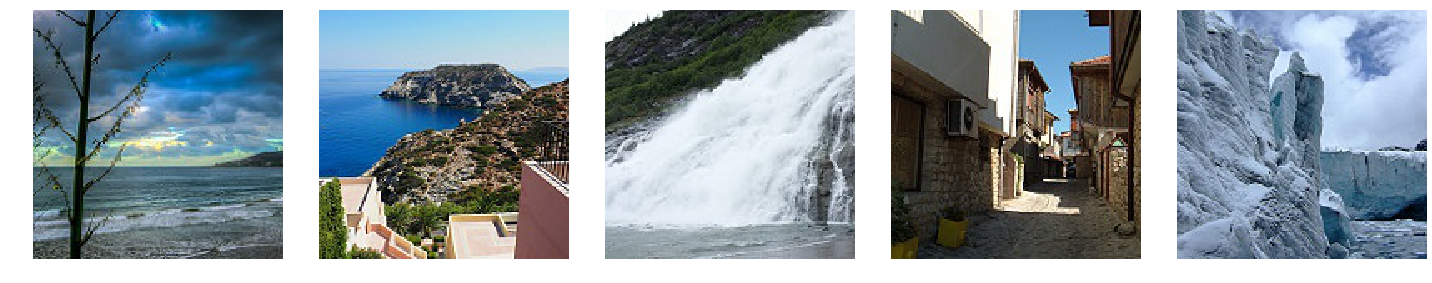

In [120]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample, _ = next(train_data)
plotImages(sample[:5])

In [51]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

In [53]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [55]:
history = model.fit_generator(
    generator=train_data,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=total_test // batch_size
)

Epoch 1/15
109/109 [==============================] - 93s 853ms/step - loss: 1.0509 - accuracy: 0.5977 - val_loss: 0.7946 - val_accuracy: 0.7062
Epoch 2/15
109/109 [==============================] - 107s 978ms/step - loss: 0.7005 - accuracy: 0.7397 - val_loss: 0.6619 - val_accuracy: 0.7476
Epoch 3/15
109/109 [==============================] - 105s 966ms/step - loss: 0.5357 - accuracy: 0.8084 - val_loss: 0.6893 - val_accuracy: 0.7582
Epoch 4/15
109/109 [==============================] - 108s 988ms/step - loss: 0.4873 - accuracy: 0.8244 - val_loss: 0.5283 - val_accuracy: 0.8152
Epoch 5/15
109/109 [==============================] - 105s 968ms/step - loss: 0.3979 - accuracy: 0.8606 - val_loss: 0.5737 - val_accuracy: 0.8023
Epoch 6/15
109/109 [==============================] - 106s 973ms/step - loss: 0.3322 - accuracy: 0.8806 - val_loss: 0.7883 - val_accuracy: 0.7548
Epoch 7/15
109/109 [==============================] - 108s 987ms/step - loss: 0.2926 - accuracy: 0.8996 - val_loss: 0.6155 - 

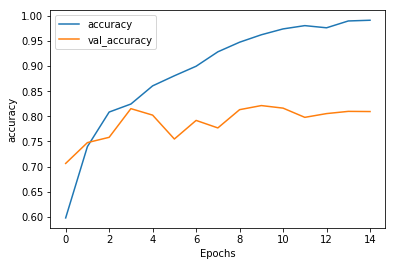

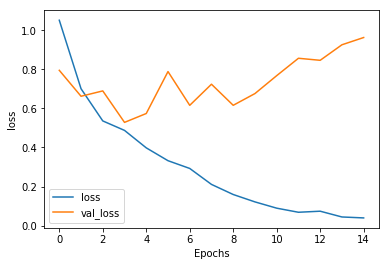

In [57]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [70]:
sample, _ = next(pred_data)

In [85]:
pred_class = model.predict_classes(sample)
pred_prob = model.predict(sample)

In [108]:
predictions = []
for i in range(batch_size):
    predictions.append((sample[i], categories[pred_class[i]]))

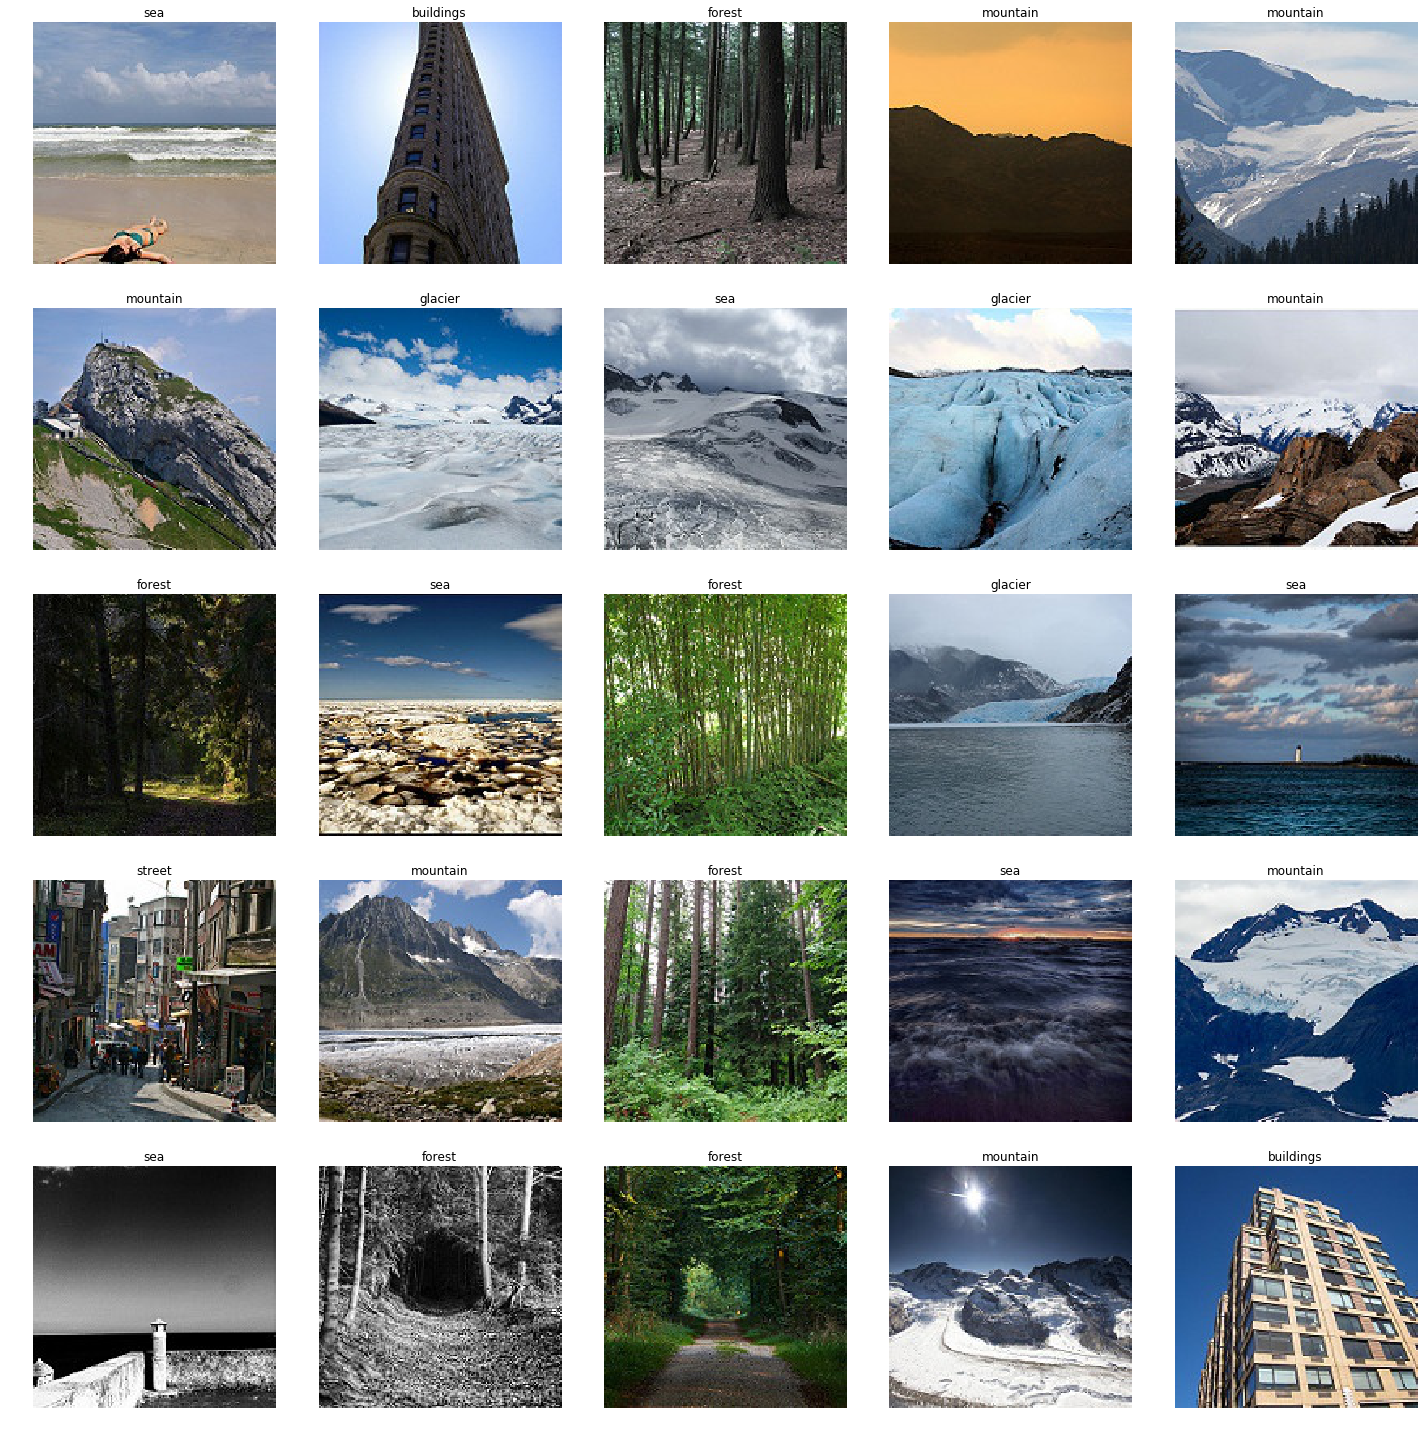

In [117]:
pred_sample = random.sample(predictions, 25)

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip(pred_sample, axes):
    ax.imshow(img[0])
    ax.axis('off')
    ax.set_title(img[1])
plt.tight_layout()
plt.show()